In [1]:
import numpy as np
import math
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def c(n, k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))


# проверяет, что граница Хемминга выполняется для данных n, k, d
def check_hamming(n, k, d):
    t = (d - 1) // 2
    total_sum = 0
    for i in range(t + 1):
        total_sum += c(n, i)
    return total_sum <= 2 ** (n - k)


# проверяет, что граница Варшамова-Гилберта выполняется для данных n, k, d
def check_hilbert(n, k, d):
    total_sum = 0
    for i in range(d - 1):
        total_sum += c(n - 1, i)
    return total_sum < 2 ** (n - k)


# последовательным перебором ищет значение d для данных n, k и границы
def find_border(n, k, border_checker): 
    cur_d = 1
    while True:
        if not border_checker(n, k, cur_d):
            return cur_d - 1
            break
        else:
            cur_d += 1
            

rs = list(range(1, 11))
hammings = []
hilberts = []
ds = []

for r in tqdm(rs):
    d = 2 ** (r - 1)
    k = r
    n = (2 ** r) - 1
    
    ds.append(d)
    
    d_hamming = find_border(n, k, check_hamming)
    d_hilbert = find_border(n, k, check_hilbert)
    
    hammings.append(d_hamming)
    hilberts.append(d_hilbert)

100%|██████████| 10/10 [00:38<00:00,  3.89s/it]


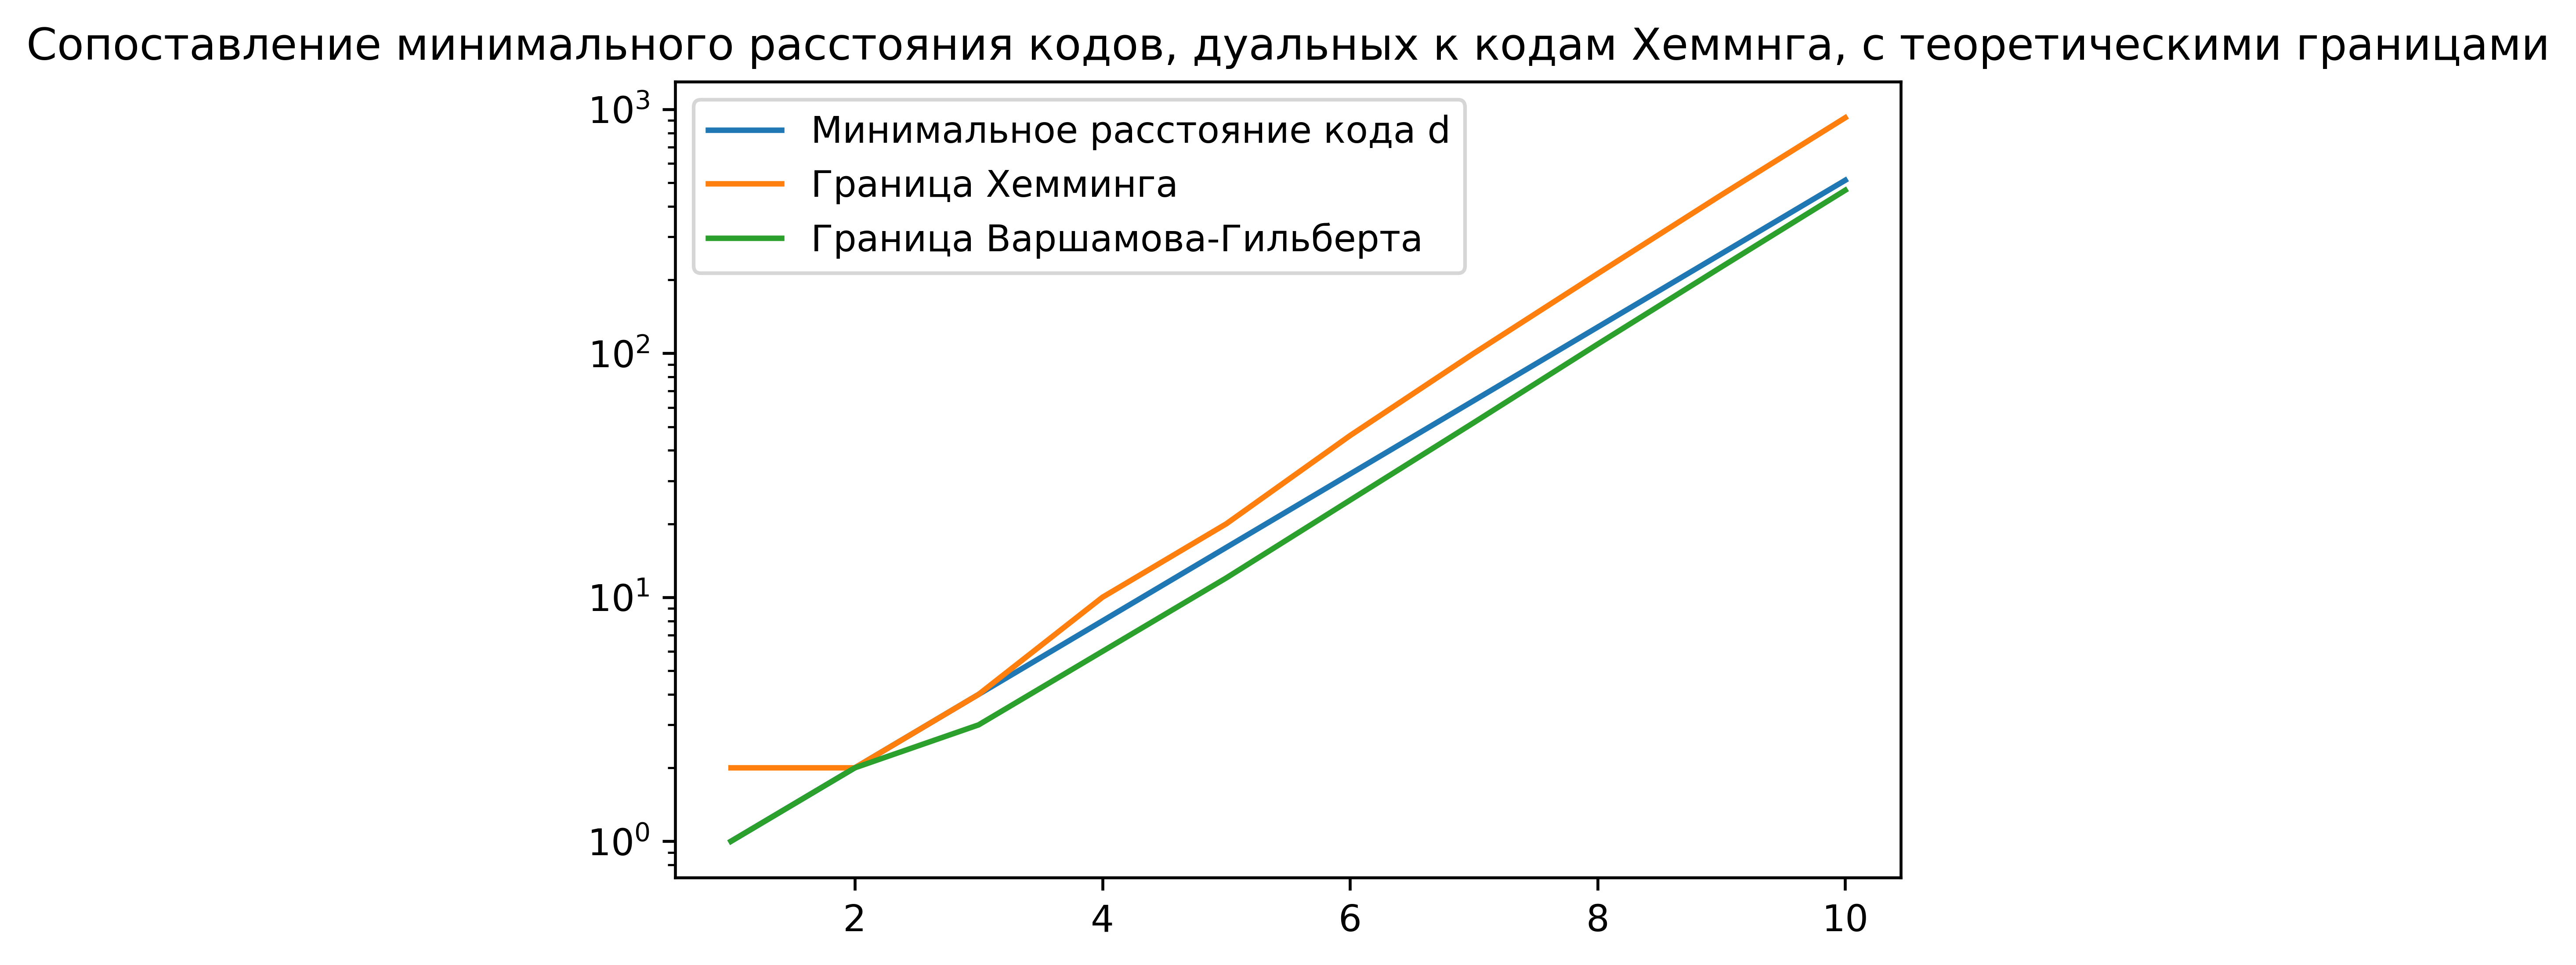

In [3]:
plt.figure(dpi=600)
plt.semilogy(rs, ds, label='Минимальное расстояние кода d')
plt.semilogy(rs, hammings, label='Граница Хемминга')
plt.semilogy(rs, hilberts, label='Граница Варшамова-Гильберта')
plt.legend(loc='upper left')
plt.title('Сопоставление минимального расстояния кодов, дуальных к кодам Хеммнга, с теоретическими границами')
plt.show()

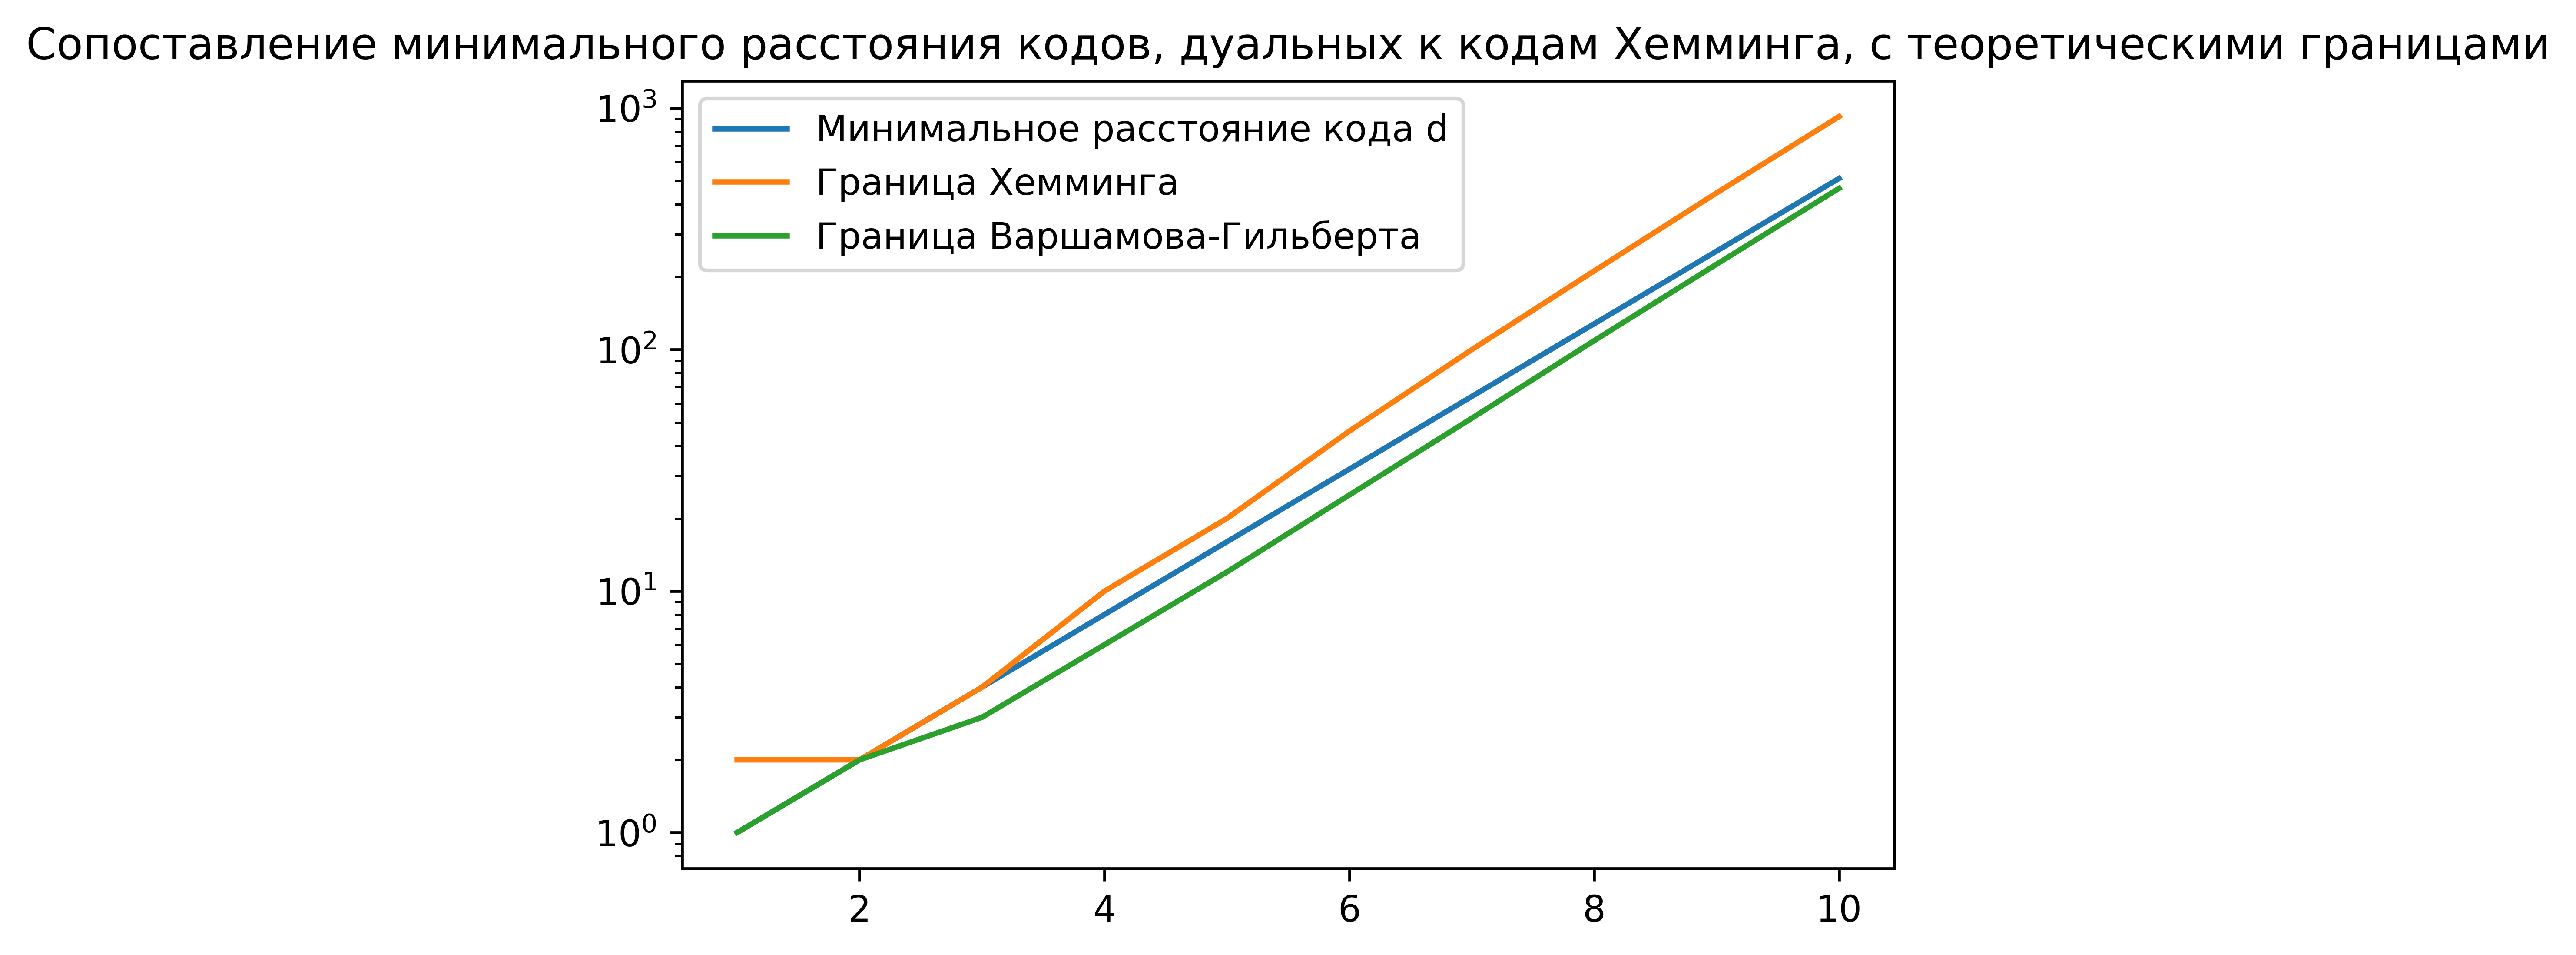

In [5]:
plt.figure(dpi=600)
plt.semilogy(rs, ds, label='Минимальное расстояние кода d')
plt.semilogy(rs, hammings, label='Граница Хемминга')
plt.semilogy(rs, hilberts, label='Граница Варшамова-Гильберта')
plt.legend(loc='upper left')
plt.title('Сопоставление минимального расстояния кодов, дуальных к кодам Хемминга, с теоретическими границами')
plt.savefig('dist.png')